# Model Creation

• **[50 points] Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them more
accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel
only is fine to use.** 

### Data Review and Standardization

The raw dataset consists of 72983 observations, with 34 total variables, 1 of which represents a unique index for the cars purchased. In terms of breakdown, there are:

    •	1 Reference ID
    •	8 Ordinal features, 2 of the 8 being boolean
    •	14 Categorical features
    •	11 Continuous features

For this study, we utilized the final dataset that was preprocessed and standardized during Lab 1 by utilizing the import function.

Below is a short data of our initial data review, data cleaning, and data standardization was performed in Lab 1. For complete details, please refer to **Lab 1 Final Submission**.

From the initial import during our first review in Lab 1 , we identified some immediate problems were addressed through the data validation process. Primary issues were related to missing values, as well as adjusting data types to account for the appropriate features. Full field descriptions are provided in **Table 1.2.1 of Lab1 Final Submission**.

To address data fields with missing values, we utilized means and modes to impute replacement values for missing values on continuous and ordinal variables, where possible. For categorical variables, we reclassify missing values to an UNKNOWN category for the variable. Finally, the variables PRIMEUNIT and AUCGUART were both found to contain very few real values (as aformentioned above). As a result, it was determined that the best course of action was to remove these data from consideration entirely. As a result these columns were dropped from the data. For more detailed information, please refer to **Lab 1 final submission, section 1.3.2: “Data Cleanup and Imputation”**.

Given the data dictionary and definitions are sparse of specific details on units, we chose the conservative route by standardizing all continous variables. In this way, we better guarantee proper representation and weighting of the variables. This procedure is shown in **Lab 1 Final Submission, section 1.3.3 Standardization** - Rescaling All Continuous Variables and is done prior to reviewing Univariant and Bivariate Analysis EDA.

Some variables proved to be highly correlated. To address multicollinearity concerns, all MMR variables were dropped from the final scaled dataset, with the exception of MMRAcquisitionRetailAveragePrice and MMRAcquisitionAuctionAveragePrice. Final profiling for the clean and standarized dataframe, with imputed values, is provided in **Lab 1 Final Submission, section 1.3.5 Standardized and Clean Data Profiling**.


### Logistic Regression Model Construction 

Our dataset was 88% negative, 12% positive class.  With such huge class imbalance, any naive classifier
who guesses everything to be negative would be 88% accurate.  Through our literature search, we found that when building models with imbalanced data, using the classifiers produced by standard machine learning algorithms without adjusting the output threshold may cause poor performance. Therefore,  we elected to use H20”s generalized linear models (GLM) to build a binomial classification model as it does not require special handling for imbalanced data.

H2O’s Binomial GLM implementation presents a high-performance distributed algorithm that scales linearly with the number of rows and works extremely well for datasets with a limited number of active predictors.  

To get the best possible model, we set our model to perform a lambda search based on a 100 k-fold cross validation.  Lambda search enables efficient and automatic search for optimal value of the lambda parameter. When lambda search is enabled, GLM will first fit a model with maximum regularization strength and then keep decreasing it until overfitting. The resulting model will be based on the best lambda value that is selected based on performance of cross validation.


###  Support Vector Model Construction

To construct our SVM model, we first explored the H20 manual grid search where we conducted a search for an ideal hyperplane in regard to the support vectors.  H2O’s implementation of support vector machine follows the PSVM algorithm specified by Edward Y. Chang and others. 

We leveraged hyperparameter grid search based on 1000 iteration run with a penalty parameter C of the error term set to 10 improve the fitting the underlying model to our dataset which helped distinguish them from model coefficients. The optimization of the sets of hyperparameter values help find the best model for the dataset. H2O helps grouping the hyperparameters by their importance. We used cross-validation for training the dataset to manage the risk of overfitting of our model and to test the model’s minimum validation error for hyperparameter vector. Our final H20 SVM model performed with 87% accuracy, suggesting that SVM maybe the preferred model.  However, upon closer inspection of the confusion matrix, it was clear that the high accuracy score was inflated due to data imbalance and should not be used as is for interpretation.  In response to this discovery, we elected to change modeling packages and utilize SKL Learn to tackle the data imbalance in our dataset as it provides an option to generate a balanced accuracy score in addition to the standard accuracy score, and relative ease to measure ROC AUC metrics for each model. 


### Parameter Adjustments

To help increase model accuracy while strengthening model reproducibility; the following parameter adjustments were made to the baseline model for both Regression and SVM models:

1. “VehYear” captures the same information as “VehicleAge”  and therefore was eliminated from the model due to redundancy.  When considering which variable to remove, it was determined that “vehicleAge” provided for greater flexibility by removing the time period constraint.  

2. “WheelTypeId” captures the same information as  “WheelType” but in variable form and therefore was also removed due to redundancy.  

3. “VNZIP1” (zip code)  and “VNST” (state abbrev.) both describe the location of the car auction.  To help minimize the level of noise and avoid redundancy, “VNZIP1” (zip code) was removed from the model.

4. To stay competitive, car makers introduce new models to market every four to seven years and these models are refreshed with minor functional and cosmetic changes around halfway through their life cycle. As a result, we identified more than 1064 unique model names in our dataset.  In response to the noise identified, “Model”, “Trim” and “SubModel” were removed from the model to help reduce the risk of overfitting the model to the data. 

5. “TopThreeAmericanName” and “Nationality” were removed after initial model results indicated that both variables were not significant, nor received any coefficient weights. 

Final predictors selected in our final model were vehicle average retail price, acquisition price, purchase cost, warranty cost, brand manufacturer, age, size, color, luxury type, mileage, transmission,  Auction Company, Auction location state, and whether or not the purchase was made online. 21 variables total in count.  


## Performance Evaluation Metrics

Total profit represents the financial gain that a car dealership will make if they follow the predictions of our model while taking into account opportunity cost. All cars that are classified as good and are actually good (true positives) will make the dealership money.   At the same time, all cars that are classified as good, but are actually not (false negatives) will cause the dealership to incur a Loss based on the vehicle’s purchase cost. The Opportunity cost for a car dealership equates to potential profit lost from any car classified as bad that actually was not (i.e. false post positive). Based on these facts, it is important to select a performance metric that places greater importance on false positives and false negatives vs. generalized accuracy.  

The metrics of choice to satisfy this condition were:
1.	ROC AUC (Receiver Operating Characteristic Area Under Curve): This model metric is used to evaluate how well a binary classification model is able to distinguish between true positives and false positives. An AUC of 1 indicates a perfect classifier, while an AUC of .5 indicates a poor classifier, whose performance is no better than random guessing. H2O uses the trapezoidal rule to approximate the area under the ROC curve.


2.	F2 Score: The F2 score is the weighted harmonic mean of the precision and recall (given a threshold value). Unlike the F1 score, which gives equal weight to precision and recall, the F2 score gives more weight to recall (penalizing the model more for false negatives then false positives). An F2 score ranges from 0 to 1, with 1 being a perfect model.

Below is a short summary of the performance statistics derived from each model that was performed. For complete details, please see refer to each model performance metrics summary.

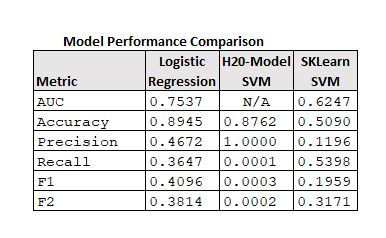

In [1]:
from IPython.display import Image
Image("performance.jpg")

## Prereqs and Helper Functions

In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [2]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
        
      

In [3]:
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [4]:
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [5]:
sys.meta_path.append(NotebookFinder())

In [6]:
#Review of overall data quality
def nullcounts(ser):
    return ser.isnull().sum()

def detail_describe(frame, func=['count', nullcounts, 'mean', 'std', 'min', 'median', 'max'],
                    numeric_only=False, **kwargs):
    return frame.agg(func, **kwargs)

## Import Data Prep 

In [7]:
import lab1_final_data

importing Jupyter notebook from lab1_final_data.ipynb


## Verify Data

In [8]:
lab1_final_data.kick_imputed_scaled

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Mileage,Luxury,Axle,state,zip,Cylinder,model_short
0,0,1260144000,ADESA,2006,3,MAZDA,i,4D SEDAN I,RED,AUTO,1,Alloy,0.759487,OTHER ASIAN,MEDIUM,OTHER,0.228291,0.297748,21973,33619,FL,0.156132,0,0.092524,HIGH,0,Unknown,FL,33619.0,Unknown,MAZDA3
1,0,1260144000,ADESA,2004,5,DODGE,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1,Alloy,0.800491,AMERICAN,LARGE TRUCK,CHRYSLER,0.191871,0.278838,19638,33619,FL,0.167129,0,0.083997,HIGH,0,2WD,FL,33619.0,Unknown,1500
2,0,1260144000,ADESA,2005,4,DODGE,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2,Covers,0.622065,AMERICAN,MEDIUM,CHRYSLER,0.089637,0.177661,19638,33619,FL,0.107746,0,0.131751,HIGH,0,Unknown,FL,33619.0,V6,S
3,0,1260144000,ADESA,2004,5,DODGE,SXT,4D SEDAN,SILVER,AUTO,1,Alloy,0.548209,AMERICAN,COMPACT,CHRYSLER,0.052993,0.119191,19638,33619,FL,0.090151,0,0.023877,GOOD,0,Unknown,FL,33619.0,Unknown,NEON
4,0,1260144000,ADESA,2005,4,FORD,ZX3,2D COUPE ZX3,SILVER,MANUAL,2,Covers,0.582026,AMERICAN,COMPACT,FORD,0.109540,0.197620,19638,33619,FL,0.087952,0,0.079306,HIGH,0,Unknown,FL,33619.0,Unknown,S
5,0,1260144000,ADESA,2004,5,MITSUBISHI,ES,4D SEDAN ES,WHITE,AUTO,2,Covers,0.687417,OTHER ASIAN,MEDIUM,OTHER,0.109204,0.171597,19638,33619,FL,0.123142,0,0.018761,HIGH,0,Unknown,FL,33619.0,V4,L
6,0,1260144000,ADESA,2004,5,KIA,EX,4D SEDAN EX,BLACK,AUTO,2,Covers,0.545603,OTHER ASIAN,MEDIUM,OTHER,0.083030,0.159672,19638,33619,FL,0.092351,0,0.010091,GOOD,0,Unknown,FL,33619.0,Unknown,S
7,0,1260144000,ADESA,2005,4,FORD,SE,4D SEDAN SE,WHITE,AUTO,2,Covers,0.549904,AMERICAN,MEDIUM,FORD,0.092744,0.170599,19638,33619,FL,0.098949,0,0.051592,HIGH,0,Unknown,FL,33619.0,Unknown,S
8,0,1260144000,ADESA,2007,2,KIA,EX,4D SEDAN EX,BLACK,AUTO,2,Covers,0.406666,OTHER ASIAN,MEDIUM,OTHER,0.173451,0.247876,21973,33619,FL,0.123142,0,0.002843,HIGH,0,Unknown,FL,33619.0,Unknown,S
9,0,1260144000,ADESA,2007,2,FORD,SEL,4D SEDAN SEL,RED,AUTO,1,Alloy,0.721846,AMERICAN,LARGE,FORD,0.219613,0.300256,21973,33619,FL,0.169328,0,0.166430,HIGH,0,Unknown,FL,33619.0,Unknown,FIVE HUNDRED


In [9]:
detail_describe(lab1_final_data.kick_imputed_scaled).transpose()

,count,nullcounts,mean,std,min,median,max
IsBadBuy,72983,0,0.122988,0.328425,0,0,1
PurchDate,72983,0,1.26309e+09,1.8196e+07,1.23111e+09,1.26403e+09,1.29367e+09
Auction,72983,0,NaN,NaN,ADESA,NaN,OTHER
VehYear,72983,0,2005.34,1.73125,2001,2005,2010
VehicleAge,72983,0,4.17664,1.71221,0,4,9
Make,72983,0,NaN,NaN,ACURA,NaN,VOLVO
Trim,72983,0,NaN,NaN,1,NaN,s
SubModel,72983,0,NaN,NaN,2D CONVERTIBLE,NaN,WAGON SXT AWD
Color,72983,0,NaN,NaN,BEIGE,NaN,YELLOW
Transmission,72983,0,NaN,NaN,AUTO,NaN,UNKNOWN


In [10]:
try:
    del lab1_final_data.kick_imputed_scaled['state']
except:
    print("Columns not found. Drop has already been performed.")

try:
    del lab1_final_data.kick_imputed_scaled['zip']
except:
    print("Columns not found. Drop has already been performed.")
    
try:
    del lab1_final_data.kick_imputed_scaled['SubModel']
except:
    print("Columns not found. Drop has already been performed.")

#should be categorical - Add Luxury, Axle, and Mileage
categorical_features = ['Auction', 'Make', 'model_short', 'Trim',
                        'Color', 'Transmission',
                       'WheelType', 'Nationality', 'Size',
                       'TopThreeAmericanName',
                        'VNST', 'Luxury', 'Axle', 'Mileage', 'Cylinder'
                       ]

## Logistic Regression (H2O)

In [12]:
import pandas as pd
import numpy as np
import h2o
try:
    #clean slate, in case cluster was already running
    h2o.connect()
    h2o.shutdown(prompt=False)
    h2o.remove_all()
except:
    print("couldnt connect, no h2o found which is fine")

h2o.init(max_mem_size = "12G")  #specify max number of bytes. uses all cores by default.

from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Connecting to H2O server at http://localhost:54321 ....... failed.
couldnt connect, no h2o found which is fine
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 12.0.2+10, mixed mode, sharing)
  Starting server from C:\Users\Vonnia\AppData\Roaming\Python\Python37\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Vonnia\AppData\Local\Temp\tmp92ewsc4z
  JVM stdout: C:\Users\Vonnia\AppData\Local\Temp\tmp92ewsc4z\h2o_Vonnia_started_from_python.out
  JVM stderr: C:\Users\Vonnia\AppData\Local\Temp\tmp92ewsc4z\h2o_Vonnia_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.6
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_Vonnia_ef6y23
H2O cluster total nodes:,1
H2O cluster free memory:,12 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [13]:
h2o_frame = h2o.H2OFrame(lab1_final_data.kick_imputed_scaled)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
#Set variables and columns
isBad_y = 'IsBadBuy'
isBad_x = h2o_frame.col_names
try:
    isBad_x.remove('state') #duplicate column
    isBad_x.remove('zip') #duplicate column
    isBad_x.remove('SubModel')
except:
    print("Columns not found. Drop has already been performed.")

isBad_x.remove(isBad_y)
isBad_x.remove('PurchDate')
isBad_x.remove('VehYear')
isBad_x.remove('VNZIP1')
isBad_x.remove('WheelTypeID')
isBad_x.remove('Nationality')
isBad_x.remove('model_short') 
isBad_x.remove('TopThreeAmericanName') 
isBad_x.remove('Trim')

print("Response = " + str(isBad_y))
print("Predictors = " + str(isBad_x))

Columns not found. Drop has already been performed.
Response = IsBadBuy
Predictors = ['Auction', 'VehicleAge', 'Make', 'Color', 'Transmission', 'WheelType', 'VehOdo', 'Size', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice', 'BYRNO', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Mileage', 'Luxury', 'Axle', 'Cylinder']


In [15]:
#set as factor
h2o_frame['IsBadBuy'] = h2o_frame['IsBadBuy'].asfactor()
h2o_frame['IsBadBuy'].levels()

[['0', '1']]

In [16]:
#Outline datasets
train, valid, test = h2o_frame.split_frame([0.8, 0.1], seed=1234)
print('Total Dataset: ' + str(h2o_frame.shape))
print('Train: ' + str(train.shape))
print('Validate: ' + str(valid.shape))
print('Test: ' + str(test.shape))

Total Dataset: (72983, 28)
Train: (58364, 28)
Validate: (7156, 28)
Test: (7463, 28)


In [17]:
#perform a regression
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

glm_logistic = H2OGeneralizedLinearEstimator(family = "binomial", nfolds = 100, lambda_search = True, remove_collinear_columns=True)
glm_logistic.train(x=isBad_x, y=isBad_y, training_frame=train, validation_frame=valid, model_id="glm_logistic")

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [18]:
print("Validation AUC (100-fold CV): " + str(glm_logistic.auc(xval = True)))
print("Accuracy (100-fold CV): " + str(glm_logistic.accuracy(xval = True)))

Validation AUC (100-fold CV): 0.753707492640489
Accuracy (100-fold CV): [[0.5070822608382102, 0.8944897539579193]]


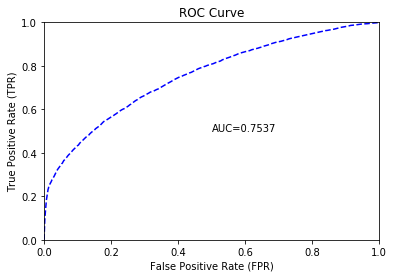

In [19]:
glm_logistic.model_performance(xval=True).plot()

In [20]:
glm_logistic.model_performance(xval = True)


ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.0887971512113477
RMSE: 0.29798850852230474
LogLoss: 0.3116370584353794
Null degrees of freedom: 58363
Residual degrees of freedom: 58275
Null deviance: 43711.29955597553
Residual deviance: 36376.77055704497
AIC: 36554.77055704497
AUC: 0.753707492640489
pr_auc: 0.42799535682575385
Gini: 0.507414985280978

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21564340834341986: 


,,0,1,Error,Rate
0,0,48133.0,3005.0,0.0588,(3005.0/51138.0)
1,1,4591.0,2635.0,0.6353,(4591.0/7226.0)
2,Total,52724.0,5640.0,0.1301,(7596.0/58364.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.215643,0.409607,178.0
1,max f2,0.093611,0.491945,288.0
2,max f0point5,0.425182,0.515143,114.0
3,max accuracy,0.507082,0.894490,100.0
4,max precision,0.954668,1.000000,0.0
5,max recall,0.004358,1.000000,399.0
6,max specificity,0.954668,1.000000,0.0
7,max absolute_mcc,0.425182,0.376414,114.0
8,max min_per_class_accuracy,0.107439,0.679352,270.0
9,max mean_per_class_accuracy,0.114044,0.683439,262.0



Gains/Lift Table: Avg response rate: 12.38 %, avg score: 12.38 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010006,0.823606,6.915192,6.915192,0.856164,0.870488,0.856164,0.870488,0.069195,0.069195,591.519210,591.519210
1,,2,0.020012,0.742732,6.320486,6.617839,0.782534,0.783088,0.819349,0.826788,0.063244,0.132438,532.048558,561.783884
2,,3,0.030001,0.647728,5.652476,6.296419,0.699828,0.697082,0.779555,0.783602,0.056463,0.188901,465.247565,529.641865
3,,4,0.040008,0.478958,4.536366,5.856217,0.561644,0.575545,0.725054,0.731565,0.045392,0.234293,353.636601,485.621705
4,,5,0.050014,0.328858,2.876720,5.260113,0.356164,0.387555,0.651250,0.662740,0.028785,0.263078,187.671991,426.011348
5,,6,0.100010,0.210990,2.114731,3.687692,0.261823,0.252679,0.456570,0.457745,0.105729,0.368807,111.473115,268.769175
6,,7,0.150007,0.172467,1.563905,2.979844,0.193626,0.189639,0.368932,0.368386,0.078190,0.446997,56.390458,197.984355
7,,8,0.200003,0.149578,1.320323,2.564999,0.163468,0.160486,0.317570,0.316416,0.066012,0.513009,32.032298,156.499895
8,,9,0.299997,0.120151,1.057366,2.062483,0.130912,0.133558,0.255354,0.255467,0.105729,0.618738,5.736558,106.248320
9,,10,0.400007,0.100571,0.888367,1.768929,0.109988,0.109671,0.219010,0.219015,0.088846,0.707584,-11.163298,76.892901


In [21]:
glm_logistic._model_json['output']['coefficients_table'].as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-2.635544,-2.061102
1,VNST.AL,0.000000,0.000000
2,VNST.AR,-0.163680,-0.163680
3,VNST.AZ,0.007596,0.007596
4,VNST.CA,0.093721,0.093721
5,VNST.CO,-0.078768,-0.078768
6,VNST.FL,-0.214458,-0.214458
7,VNST.GA,-0.166227,-0.166227
8,VNST.IA,0.039878,0.039878
9,VNST.ID,-0.406702,-0.406702


In [23]:
glm_logistic.coef()

{'Intercept': -2.6355438910409235,
 'VNST.AL': 0.0,
 'VNST.AR': -0.16367997637452852,
 'VNST.AZ': 0.00759588685594257,
 'VNST.CA': 0.09372129964430508,
 'VNST.CO': -0.07876846661653332,
 'VNST.FL': -0.21445804113449532,
 'VNST.GA': -0.16622677166199992,
 'VNST.IA': 0.0398781692426893,
 'VNST.ID': -0.4067022521337435,
 'VNST.IL': 0.38712194431722313,
 'VNST.IN': 0.10926328134840778,
 'VNST.KY': -0.7302823897529079,
 'VNST.LA': 0.05651210846452428,
 'VNST.MA': 0.0,
 'VNST.MD': 0.34897796696243466,
 'VNST.MI': -0.14869754431722354,
 'VNST.MN': -0.11624277549304253,
 'VNST.MO': 0.10284368805727546,
 'VNST.MS': 0.32514386470710277,
 'VNST.NC': -0.3046569626786907,
 'VNST.NE': 0.0,
 'VNST.NH': 1.2203016397691175,
 'VNST.NJ': 0.29247060880545767,
 'VNST.NM': -0.10800221963139839,
 'VNST.NV': 0.22314336590631656,
 'VNST.NY': 0.0,
 'VNST.OH': -0.33297176827278685,
 'VNST.OK': 0.3481971165862786,
 'VNST.OR': -0.7538983670167084,
 'VNST.PA': 0.4410918769786236,
 'VNST.SC': -0.11439811519135187,
 

In [24]:
#Confusion matrix
glm_logistic.confusion_matrix(xval = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21564340834341986: 


,,0,1,Error,Rate
0,0,48133.0,3005.0,0.0588,(3005.0/51138.0)
1,1,4591.0,2635.0,0.6353,(4591.0/7226.0)
2,Total,52724.0,5640.0,0.1301,(7596.0/58364.0)


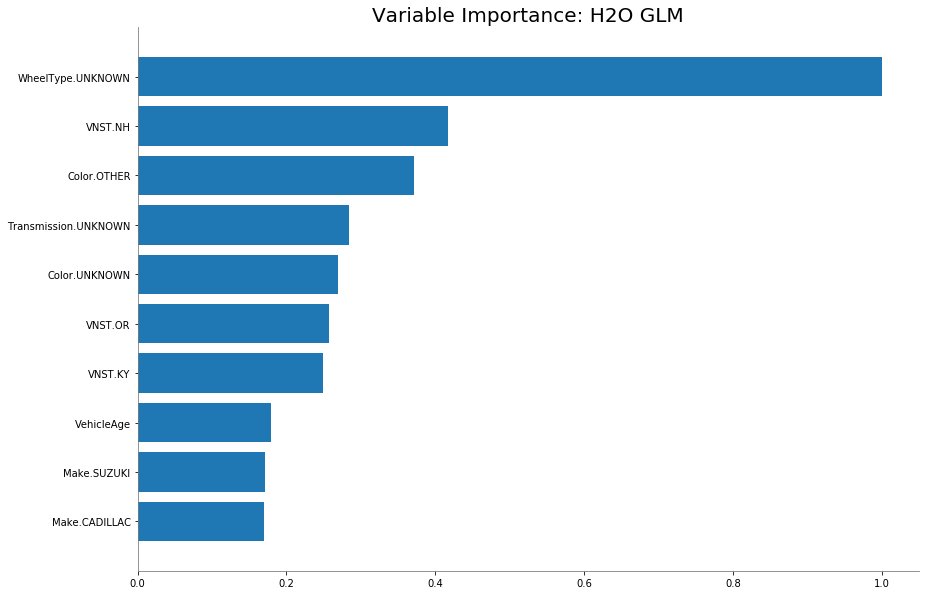

In [25]:
glm_logistic.varimp_plot()

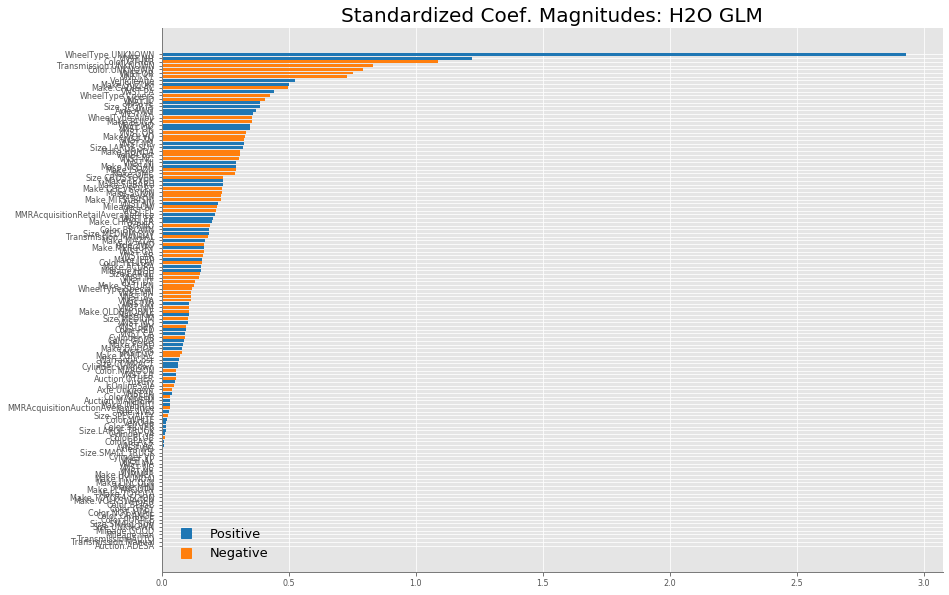

In [26]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(8,14)
plt.rcParams["xtick.labelsize"]= 8
plt.rcParams["ytick.labelsize"]= 8
glm_logistic.std_coef_plot()

## Support Vector Machine (H2O)

In [27]:
from h2o.estimators.psvm import H2OSupportVectorMachineEstimator
from h2o.grid.grid_search import H2OGridSearch
# SVM hyperparameters
svm_params1 = {'max_iterations': 100, 'disable_training_metrics': False}

In [28]:
svm_model = H2OSupportVectorMachineEstimator(**svm_params1)

In [29]:
svm_model.train(x=isBad_x, y=isBad_y, training_frame=train, validation_frame=valid)

psvm Model Build progress: |██████████████████████████████████████████████| 100%


In [31]:
print("Summary: " + str(svm_model.summary))
#print("Accuracy: " + str(svm_model.accuracy()))

Model Details
H2OSupportVectorMachineEstimator :  PSVM
Model Key:  PSVM_model_python_1570303222989_304


Model Summary: 


,,number_of_support_vectors,number_of_bounded_support_vectors,raw_model_size_in_bytes,rho,number_of_iterations,surrogate_gap,primal_residual,dual_residual
0,,56996.0,7456.0,7295488.0,-0.850011,34.0,0.000544,2.245315e-12,0.000193




ModelMetricsBinomial: psvm
** Reported on train data. **

MSE: 0.157545747378521
RMSE: 0.39692032875442523
LogLoss: NaN
Mean Per-Class Error: 0.50843791432109
AUC: NaN
pr_auc: NaN
Gini: NaN

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 


,,0,1,Error,Rate
0,0,48987.0,2151.0,0.0421,(2151.0/51138.0)
1,1,7044.0,182.0,0.9748,(7044.0/7226.0)
2,Total,56031.0,2333.0,0.1575,(9195.0/58364.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.0,0.038079,0.0
1,max f2,1.0,0.029132,0.0
2,max f0point5,1.0,0.054958,0.0
3,max accuracy,1.0,0.842454,0.0
4,max precision,1.0,0.078011,0.0
5,max recall,1.0,0.025187,0.0
6,max specificity,1.0,0.957937,0.0
7,max absolute_mcc,1.0,0.028374,0.0
8,max min_per_class_accuracy,1.0,0.025187,0.0
9,max mean_per_class_accuracy,1.0,0.491562,0.0



ModelMetricsBinomial: psvm
** Reported on validation data. **

MSE: 0.15595304639463387
RMSE: 0.394908908983621
LogLoss: NaN
Mean Per-Class Error: 0.5092924456052947
AUC: NaN
pr_auc: NaN
Gini: NaN

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 


,,0,1,Error,Rate
0,0,6022.0,243.0,0.0388,(243.0/6265.0)
1,1,873.0,18.0,0.9798,(873.0/891.0)
2,Total,6895.0,261.0,0.156,(1116.0/7156.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.0,0.031250,0.0
1,max f2,1.0,0.023529,0.0
2,max f0point5,1.0,0.046512,0.0
3,max accuracy,1.0,0.844047,0.0
4,max precision,1.0,0.068966,0.0
5,max recall,1.0,0.020202,0.0
6,max specificity,1.0,0.961213,0.0
7,max absolute_mcc,1.0,0.032732,0.0
8,max min_per_class_accuracy,1.0,0.020202,0.0
9,max mean_per_class_accuracy,1.0,0.490708,0.0


Summary: <bound method ModelBase.summary of >


In [32]:
#Confusion matrix
svm_model.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 


,,0,1,Error,Rate
0,0,48987.0,2151.0,0.0421,(2151.0/51138.0)
1,1,7044.0,182.0,0.9748,(7044.0/7226.0)
2,Total,56031.0,2333.0,0.1575,(9195.0/58364.0)


## Logistic Grid Search (H2O)

In [34]:
#logistic grid search
#lamba_search=true
#alpha search
hyper_parameters = {'alpha': [0.01,0.1,0.3,0.5,0.7,0.9,0.99]}
# test search_criteria plumbing and max_models
search_criteria = { 'strategy': "RandomDiscrete", 'seed': 42,
                    'stopping_metric': "AUTO",
                    'stopping_tolerance': 0.001,
                    'stopping_rounds': 2#,
                  #'max_runtime_secs': 60
                  }
max_models_g = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', 
                                                           lambda_search=True, 
                                                           fold_assignment='stratified',
                                                           nfolds = 100, #long time run
                                                           remove_collinear_columns=True),
                             hyper_parameters, search_criteria=search_criteria)
max_models_g.train(x=isBad_x, y=isBad_y, training_frame=train, validation_frame=valid)
max_models_g.show()
print(max_models_g.grid_id)
print(max_models_g.get_grid('F1', False))
print(max_models_g.sorted_metric_table())
print(max_models_g.get_grid("r2"))


# Get the grid results, sorted by validation AUC
glm_gridperf = max_models_g.get_grid(sort_by='auc', decreasing=True)
glm_gridperf

# Grab the top GBM model, chosen by validation AUC
best_glm = glm_gridperf.models[0]

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                      model_ids  \
0     [0.5]  Grid_GLM_py_4_sid_861e_model_python_1570303222989_305_model_4   
1     [0.1]  Grid_GLM_py_4_sid_861e_model_python_1570303222989_305_model_1   
2    [0.99]  Grid_GLM_py_4_sid_861e_model_python_1570303222989_305_model_3   
3     [0.7]  Grid_GLM_py_4_sid_861e_model_python_1570303222989_305_model_5   
4     [0.9]  Grid_GLM_py_4_sid_861e_model_python_1570303222989_305_model_2   

               logloss  
0  0.31158961734534535  
1   0.3116023568109558  
2   0.3116068952367412  
3    0.311640318216119  
4   0.3116504531714689  
Grid_GLM_py_4_sid_861e_model_python_1570303222989_305
      alpha                                                      model_ids  \
0     [0.1]  Grid_GLM_py_4_sid_861e_model_python_1570303222989_305_model_1   
1     [0.9]  Grid_GLM_py_4_sid_861e_model_python_1570303222989_305_model_2   
2    [0.99] 

In [35]:
best_glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_4_sid_861e_model_python_1570303222989_305_model_1


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.1, lambda = 8.973E-5 )","nlambda = 100, lambda.max = 0.5635, lambda.min = 8.973E-5, lambda....",133,114,135,py_4_sid_861e




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.08840940798180671
RMSE: 0.2973371957589678
LogLoss: 0.3099266048892919
Null degrees of freedom: 58363
Residual degrees of freedom: 58249
Null deviance: 43708.38713282424
Residual deviance: 36177.11273551727
AIC: 36407.11273551727
AUC: 0.758938026373598
pr_auc: 0.4338832680463015
Gini: 0.517876052747196

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20236212347658059: 


,,0,1,Error,Rate
0,0,47596.0,3542.0,0.0693,(3542.0/51138.0)
1,1,4404.0,2822.0,0.6095,(4404.0/7226.0)
2,Total,52000.0,6364.0,0.1361,(7946.0/58364.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.202362,0.415305,203.0
1,max f2,0.096151,0.496752,296.0
2,max f0point5,0.382441,0.515598,134.0
3,max accuracy,0.501189,0.894575,110.0
4,max precision,0.956061,1.000000,0.0
5,max recall,0.003441,1.000000,399.0
6,max specificity,0.956061,1.000000,0.0
7,max absolute_mcc,0.382441,0.377142,134.0
8,max min_per_class_accuracy,0.108033,0.684696,282.0
9,max mean_per_class_accuracy,0.116360,0.688167,273.0



Gains/Lift Table: Avg response rate: 12.38 %, avg score: 12.38 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010006,0.819432,6.942853,6.942853,0.859589,0.867342,0.859589,0.867342,0.069471,0.069471,594.285286,594.285286
1,,2,0.020012,0.738559,6.334316,6.638584,0.784247,0.779053,0.821918,0.823197,0.063382,0.132854,533.431596,563.858441
2,,3,0.030001,0.642965,5.694038,6.324095,0.704974,0.692484,0.782981,0.779676,0.056878,0.189732,469.403797,532.409522
3,,4,0.040008,0.477969,4.494875,5.866594,0.556507,0.572057,0.726338,0.727749,0.044976,0.234708,349.487486,486.659428
4,,5,0.050014,0.328216,2.973533,5.287784,0.368151,0.386834,0.654676,0.659543,0.029754,0.264462,197.353260,428.778372
5,,6,0.100010,0.210413,2.170091,3.729204,0.268677,0.252234,0.461710,0.455923,0.108497,0.372959,117.009060,272.920423
6,,7,0.150007,0.172351,1.608192,3.022281,0.199109,0.189511,0.374186,0.367129,0.080404,0.453363,60.819214,202.228095
7,,8,0.200003,0.149608,1.306483,2.593368,0.161755,0.160428,0.321083,0.315458,0.065320,0.518683,30.648312,159.336824
8,,9,0.299997,0.120348,1.089197,2.092007,0.134853,0.133692,0.259010,0.254873,0.108912,0.627595,8.919726,109.200655
9,,10,0.400007,0.100760,0.877297,1.788303,0.108617,0.109858,0.221408,0.218616,0.087739,0.715334,-12.270298,78.830315




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.08869273770383253
RMSE: 0.29781325978510853
LogLoss: 0.31002496174963895
Null degrees of freedom: 7155
Residual degrees of freedom: 7041
Null deviance: 5378.72993623976
Residual deviance: 4437.077252560834
AIC: 4667.077252560834
AUC: 0.7612391539765841
pr_auc: 0.42873319506749347
Gini: 0.5224783079531683

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19196910839341494: 


,,0,1,Error,Rate
0,0,5745.0,520.0,0.083,(520.0/6265.0)
1,1,511.0,380.0,0.5735,(511.0/891.0)
2,Total,6256.0,900.0,0.1441,(1031.0/7156.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.191969,0.424344,190.0
1,max f2,0.101537,0.499689,277.0
2,max f0point5,0.464150,0.525200,98.0
3,max accuracy,0.533455,0.895053,87.0
4,max precision,0.952928,1.000000,0.0
5,max recall,0.020564,1.000000,391.0
6,max specificity,0.952928,1.000000,0.0
7,max absolute_mcc,0.464150,0.385092,98.0
8,max min_per_class_accuracy,0.108977,0.683160,268.0
9,max mean_per_class_accuracy,0.128423,0.691069,245.0



Gains/Lift Table: Avg response rate: 12.45 %, avg score: 12.54 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010061,0.810402,6.358212,6.358212,0.791667,0.859458,0.791667,0.859458,0.063973,0.063973,535.821175,535.821175
1,,2,0.020123,0.749146,6.692854,6.525533,0.833333,0.781029,0.812500,0.820243,0.067340,0.131313,569.285447,552.553311
2,,3,0.030045,0.658949,5.882171,6.313074,0.732394,0.703694,0.786047,0.781755,0.058361,0.189675,488.217069,531.307389
3,,4,0.040106,0.513733,4.796546,5.932621,0.597222,0.596301,0.738676,0.735230,0.048260,0.237935,379.654570,493.262083
4,,5,0.050028,0.344551,2.941085,5.339327,0.366197,0.421713,0.664804,0.673052,0.029181,0.267116,194.108534,433.932748
5,,6,0.100056,0.215886,2.086376,3.712852,0.259777,0.257640,0.462291,0.465346,0.104377,0.371493,108.637586,271.285167
6,,7,0.150084,0.174932,1.660127,3.028610,0.206704,0.193015,0.377095,0.374569,0.083053,0.454545,66.012703,202.861012
7,,8,0.200112,0.150055,1.189010,2.568710,0.148045,0.161141,0.319832,0.321212,0.059484,0.514029,18.900990,156.871007
8,,9,0.300028,0.122294,1.134509,2.091088,0.141259,0.135115,0.260363,0.259237,0.113356,0.627385,13.450904,109.108839
9,,10,0.400084,0.101202,0.931017,1.800969,0.115922,0.111335,0.224240,0.222249,0.093154,0.720539,-6.898281,80.096929




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.08880618189067947
RMSE: 0.2980036608679153
LogLoss: 0.3116023568109558
Null degrees of freedom: 58363
Residual degrees of freedom: 58246
Null deviance: 43710.389149724324
Residual deviance: 36372.71990582925
AIC: 36608.71990582925
AUC: 0.754049877108118
pr_auc: 0.42808513686748306
Gini: 0.508099754216236

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19974880999842515: 


,,0,1,Error,Rate
0,0,47425.0,3713.0,0.0726,(3713.0/51138.0)
1,1,4410.0,2816.0,0.6103,(4410.0/7226.0)
2,Total,51835.0,6529.0,0.1392,(8123.0/58364.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.199749,0.409451,185.0
1,max f2,0.093603,0.492559,287.0
2,max f0point5,0.388087,0.514279,116.0
3,max accuracy,0.501285,0.894421,96.0
4,max precision,0.953146,1.000000,0.0
5,max recall,0.004157,1.000000,399.0
6,max specificity,0.953146,1.000000,0.0
7,max absolute_mcc,0.388087,0.375923,116.0
8,max min_per_class_accuracy,0.107253,0.680736,269.0
9,max mean_per_class_accuracy,0.117175,0.683543,257.0



Gains/Lift Table: Avg response rate: 12.38 %, avg score: 12.38 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010006,0.819387,6.915192,6.915192,0.856164,0.867475,0.856164,0.867475,0.069195,0.069195,591.519210,591.519210
1,,2,0.020012,0.737688,6.306655,6.610924,0.780822,0.779144,0.818493,0.823309,0.063105,0.132300,530.665519,561.092364
2,,3,0.030001,0.642174,5.666330,6.296419,0.701544,0.692383,0.779555,0.779717,0.056601,0.188901,466.632975,529.641865
3,,4,0.040008,0.478356,4.550196,5.859676,0.563356,0.572206,0.725482,0.727817,0.045530,0.234431,355.019640,485.967613
4,,5,0.050014,0.328355,2.849059,5.257346,0.352740,0.387118,0.650908,0.659654,0.028508,0.262939,184.905914,425.734645
5,,6,0.100010,0.210327,2.125803,3.691843,0.263194,0.252254,0.457084,0.455989,0.106283,0.369222,112.580304,269.184300
6,,7,0.150007,0.172388,1.550065,2.977998,0.191912,0.189528,0.368704,0.367179,0.077498,0.446720,55.006472,197.799845
7,,8,0.200003,0.149616,1.328627,2.565691,0.164496,0.160429,0.317656,0.315496,0.066427,0.513147,32.862690,156.569089
8,,9,0.299997,0.120283,1.050446,2.060638,0.130055,0.133700,0.255126,0.254901,0.105037,0.618184,5.044564,106.063799
9,,10,0.400007,0.100621,0.895286,1.769275,0.110845,0.109853,0.219053,0.218636,0.089538,0.707722,-10.471424,76.927497




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid,cv_11_valid,cv_12_valid,cv_13_valid,cv_14_valid,cv_15_valid,cv_16_valid,cv_17_valid,cv_18_valid,cv_19_valid,cv_20_valid,cv_21_valid,cv_22_valid,cv_23_valid,cv_24_valid,cv_25_valid,cv_26_valid,cv_27_valid,cv_28_valid,cv_29_valid,cv_30_valid,cv_31_valid,cv_32_valid,cv_33_valid,cv_34_valid,cv_35_valid,cv_36_valid,cv_37_valid,cv_38_valid,cv_39_valid,cv_40_valid,cv_41_valid,cv_42_valid,cv_43_valid,cv_44_valid,cv_45_valid,cv_46_valid,cv_47_valid,cv_48_valid,cv_49_valid,cv_50_valid,cv_51_valid,cv_52_valid,cv_53_valid,cv_54_valid,cv_55_valid,cv_56_valid,cv_57_valid,cv_58_valid,cv_59_valid,cv_60_valid,cv_61_valid,cv_62_valid,cv_63_valid,cv_64_valid,cv_65_valid,cv_66_valid,cv_67_valid,cv_68_valid,cv_69_valid,cv_70_valid,cv_71_valid,cv_72_valid,cv_73_valid,cv_74_valid,cv_75_valid,cv_76_valid,cv_77_valid,cv_78_valid,cv_79_valid,cv_80_valid,cv_81_valid,cv_82_valid,cv_83_valid,cv_84_valid,cv_85_valid,cv_86_valid,cv_87_valid,cv_88_valid,cv_89_valid,cv_90_valid,cv_91_valid,cv_92_valid,cv_93_valid,cv_94_valid,cv_95_valid,cv_96_valid,cv_97_valid,cv_98_valid,cv_99_valid,cv_100_valid
0,accuracy,0.8592006,0.042601213,0.84502447,0.84763575,0.91346157,0.8719212,0.75128645,0.9035714,0.87520796,0.88388216,0.8327759,0.89824563,0.85865724,0.76650566,0.8189655,0.89303905,0.8754579,0.8674699,0.8502496,0.8885246,0.87732345,0.8981002,0.81272084,0.87223166,0.8778359,0.8618881,0.8262351,0.7986111,0.88596493,0.8557692,0.87700534,0.8791946,0.8320251,0.80199665,0.8794567,0.9004975,0.81305116,0.88685524,0.85690516,0.71586716,0.8333333,0.8657487,0.891844,0.90737563,0.90123457,0.6678261,0.8732143,0.8132428,0.82978725,0.89850247,0.89520425,0.8442211,0.8189369,0.77213115,0.8936535,0.8578947,0.9064626,0.89455783,0.89616615,0.7952,0.8778761,0.89071035,0.8987993,0.88324875,0.84615386,0.88734835,0.90467936,0.8663102,0.85818183,0.87258065,0.8164557,0.8813264,0.89593494,0.8879159,0.8601036,0.88967973,0.86084145,0.9026087,0.90710384,0.82529116,0.8900709,0.8590832,0.8955224,0.8611111,0.8771044,0.879646,0.88870704,0.86378205,0.8465267,0.9160959,0.8313253,0.8581688,0.8457539,0.8131673,0.8639576,0.8932874,0.84615386,0.84375,0.8792517,0.78688526,0.85892856,0.8006757
1,auc,0.75607395,0.035099953,0.7346215,0.7700634,0.80252707,0.73368174,0.7707319,0.74118185,0.817314,0.79391223,0.76630974,0.7975842,0.76069254,0.741756,0.7749078,0.7770439,0.7664176,0.7983086,0.77097124,0.74997085,0.75807184,0.7673086,0.7499136,0.7374414,0.8000413,0.7942075,0.6637032,0.7081718,0.730603,0.75078934,0.72238594,0.74812067,0.7596162,0.7478395,0.75946707,0.7399477,0.76319194,0.7781385,0.7526616,0.73768145,0.76057786,0.7536808,0.8290994,0.7061026,0.7490959,0.6919496,0.7418699,0.7369106,0.79209876,0.80995977,0.7788859,0.79833,0.7359519,0.6785434,0.77953213,0.63796854,0.7049772,0.7312776,0.79325455,0.6893837,0.7773579,0.81127113,0.74990255,0.7942973,0.7452877,0.7153328,0.7902564,0.74060357,0.7559933,0.7850317,0.69166297,0.76248187,0.7385642,0.7529983,0.7474846,0.6979114,0.70389086,0.77163947,0.7837254,0.7855284,0.8078332,0.7681311,0.7098475,0.7642463,0.78280324,0.7422367,0.79976636,0.7914253,0.78243876,0.8164221,0.71621066,0.73682344,0.772327,0.75966495,0.7189354,0.7607563,0.76305157,0.7582304,0.7943358,0.7340504,0.7556538,0.73423237
2,err,0.1407994,0.042601213,0.15497553,0.15236427,0.086538464,0.12807882,0.24871355,0.09642857,0.12479201,0.11611785,0.16722408,0.10175438,0.14134276,0.23349437,0.18103448,0.10696095,0.124542125,0.13253012,0.14975041,0.11147541,0.12267658,0.101899825,0.18727915,0.12776831,0.12216405,0.13811189,0.1737649,0.2013889,0.114035085,0.14423077,0.122994654,0.12080537,0.16797489,0.19800332,0.12054329,0.09950249,0.18694885,0.113144755,0.14309484,0.28413284,0.16666667,0.1342513,0.108156025,0.09262436,0.09876543,0.3321739,0.12678571,0.18675722,0.17021276,0.1014975,0.10479574,0.1557789,0.18106312,0.22786885,0.10634648,0.14210527,0.09353741,0.105442174,0.10383387,0.2048,0.12


See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
0,,2019-10-05 14:52:11,0.000 sec,1,.56E0,1,0.748893,0.751639,0.748829,0.005335
1,,2019-10-05 14:52:11,0.010 sec,2,.51E0,2,0.747912,0.750743,0.747965,0.005327
2,,2019-10-05 14:52:11,0.016 sec,3,.47E0,2,0.746893,0.749813,0.746950,0.005317
3,,2019-10-05 14:52:11,0.020 sec,4,.43E0,2,0.745837,0.748852,0.745899,0.005307
4,,2019-10-05 14:52:11,0.026 sec,5,.39E0,2,0.744748,0.747863,0.744815,0.005297
5,,2019-10-05 14:52:11,0.035 sec,6,.35E0,2,0.743631,0.746850,0.743702,0.005287
6,,2019-10-05 14:52:11,0.044 sec,7,.32E0,2,0.742491,0.745819,0.742566,0.005276
7,,2019-10-05 14:52:11,0.051 sec,8,.29E0,4,0.740999,0.744386,0.741151,0.005266
8,,2019-10-05 14:52:11,0.061 sec,9,.27E0,4,0.739387,0.742807,0.739537,0.005256
9,,2019-10-05 14:52:11,0.072 sec,10,.24E0,6,0.737605,0.741055,0.737844,0.005246



See the whole table with table.as_data_frame()


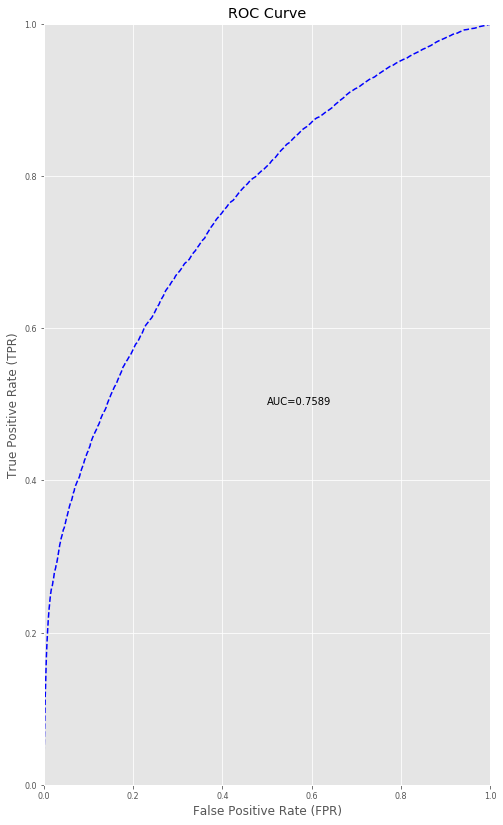

In [36]:
best_glm.model_performance().plot()

In [37]:
# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_glm_perf = best_glm.model_performance(test)
best_glm_perf.auc()

0.7535849793648186

## SVM Manual Grid Search (H2O)

In [38]:
#try a gridsearch
# SVM hyperparameters
svm_params1 = {'max_iterations': 1000, 
               'disable_training_metrics': False,
              'gamma': 0.0001, 
              'hyper_param': 1}

svm_model = H2OSupportVectorMachineEstimator(**svm_params1)
svm_model.train(x=isBad_x, y=isBad_y, training_frame=train, validation_frame=valid)
#print("Summary: " + str(svm_model.summary))
#Confusion matrix
svm_model.confusion_matrix()

psvm Model Build progress: |██████████████████████████████████████████████| 100%

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 


,,0,1,Error,Rate
0,0,51138.0,0.0,0.0,(0.0/51138.0)
1,1,7225.0,1.0,0.9999,(7225.0/7226.0)
2,Total,58363.0,1.0,0.1238,(7225.0/58364.0)


In [39]:
#try a gridsearch
# SVM hyperparameters
svm_params1 = {'max_iterations': 1000, 
               'disable_training_metrics': False,
              'gamma': 0.0001, 
              'hyper_param': 10}


svm_model = H2OSupportVectorMachineEstimator(**svm_params1)
svm_model.train(x=isBad_x, y=isBad_y, training_frame=train, validation_frame=valid)
#print("Summary: " + str(svm_model.summary))

#Confusion matrix
svm_model.confusion_matrix()

psvm Model Build progress: |██████████████████████████████████████████████| 100%

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 


,,0,1,Error,Rate
0,0,51138.0,0.0,0.0,(0.0/51138.0)
1,1,7225.0,1.0,0.9999,(7225.0/7226.0)
2,Total,58363.0,1.0,0.1238,(7225.0/58364.0)


In [40]:
#try a gridsearch
# SVM hyperparameters
svm_params1 = {'max_iterations': 1000, 
               'disable_training_metrics': False,
              'gamma': 0.0001, 
              'hyper_param': 100}


svm_model = H2OSupportVectorMachineEstimator(**svm_params1)
svm_model.train(x=isBad_x, y=isBad_y, training_frame=train, validation_frame=valid)
#print("Summary: " + str(svm_model.summary))
#Confusion matrix
svm_model.confusion_matrix()

psvm Model Build progress: |██████████████████████████████████████████████| 100%

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 


,,0,1,Error,Rate
0,0,48523.0,2615.0,0.0511,(2615.0/51138.0)
1,1,6647.0,579.0,0.9199,(6647.0/7226.0)
2,Total,55170.0,3194.0,0.1587,(9262.0/58364.0)


In [41]:
# Looka like C= 1 is best
# Lets tweak gamma
#try a gridsearch
# SVM hyperparameters
svm_params1 = {'max_iterations': 1000, 
               'disable_training_metrics': False,
              'gamma': 0.001, 
              'hyper_param': 1}

svm_model = H2OSupportVectorMachineEstimator(**svm_params1)
svm_model.train(x=isBad_x, y=isBad_y, training_frame=train, validation_frame=valid)
#print("Summary: " + str(svm_model.summary))
#Confusion matrix
svm_model.confusion_matrix()

psvm Model Build progress: |██████████████████████████████████████████████| 100%

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 


,,0,1,Error,Rate
0,0,51138.0,0.0,0.0,(0.0/51138.0)
1,1,7225.0,1.0,0.9999,(7225.0/7226.0)
2,Total,58363.0,1.0,0.1238,(7225.0/58364.0)


In [42]:
svm_model.mse()
svm_model.accuracy()

[[1.0, 0.8762079363991502]]

## SVM Grid Search (SKLearn)

In [18]:
##########################################
## Helper Functions for the Grid Search ##
##########################################
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
import copy
import warnings

def test_accuracy(model, n_splits=10, print_steps=False, params={}):
    accuracies = []
    for i in range(1, n_splits+1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
        yhat, _ = model(
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            **params
        )
        accuracy = float(sum(yhat==y_test)) / len(y_test)
        accuracies.append(accuracy)
        if print_steps:
            matrix = pd.DataFrame(confusion_matrix(y_test, yhat),
                columns=['Predicted 1', 'Predicted 0'],
                index=['Actual 1', 'Actual 0'],
            )
            print('*' * 15 + ' Step %d ' % i + '*' * 15)
            print('Accuracy:', accuracy)
            print(matrix)
            
    return np.mean(accuracies)

def support_vector_machine_model(X_train, y_train, X_test, **params):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    clf = SVC(**params)
    clf.fit(X_train, y_train)
    return clf.predict(X_test), clf

In [19]:
# SKLearn: lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics as mt
import numpy as np
import importlib
import lab1_final_data
importlib.reload(lab1_final_data)

df_imputed = lab1_final_data.kick_imputed_scaled

importing Jupyter notebook from lab1_final_data.ipynb


In [20]:
# clean up data fields that we know are better left out

try:
    del df_imputed['state']
except:
    print("Columns not found. Drop has already been performed.")

try:
    del df_imputed['zip']
except:
    print("Columns not found. Drop has already been performed.")
    
try:
    del df_imputed['SubModel']
except:
    print("Columns not found. Drop has already been performed.")

try:
    del df_imputed['PurchDate']
except:
    print("Columns not found. Drop has already been performed.")
    
try:
    del df_imputed['VehYear']
except:
    print("Columns not found. Drop has already been performed.")
    
try:
    del df_imputed['VNZIP1']
except:
    print("Columns not found. Drop has already been performed.")
    
try:
    del df_imputed['WheelTypeID']
except:
    print("Columns not found. Drop has already been performed.")
    
try:
    del df_imputed['Nationality']
except:
    print("Columns not found. Drop has already been performed.")
    
try:
    del df_imputed['model_short']
except:
    print("Columns not found. Drop has already been performed.")
    
try:
    del df_imputed['TopThreeAmericanName']
except:
    print("Columns not found. Drop has already been performed.")

try:
    del df_imputed['Trim']
except:
    print("Columns not found. Drop has already been performed.")


#should be categorical - Add Luxury, Axle, Mileage
categorical_features = ['Auction', 'Make',
                        'Color', 'Transmission',
                       'WheelType', 'Size',
                        'VNST', 'Luxury', 'Axle', 'Mileage', 'Cylinder'
                       ]



In [21]:
df_imputed

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost,Mileage,Luxury,Axle,Cylinder
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,0.759487,MEDIUM,0.228291,0.297748,21973,FL,0.156132,0,0.092524,HIGH,0,Unknown,Unknown
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,0.800491,LARGE TRUCK,0.191871,0.278838,19638,FL,0.167129,0,0.083997,HIGH,0,2WD,Unknown
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,0.622065,MEDIUM,0.089637,0.177661,19638,FL,0.107746,0,0.131751,HIGH,0,Unknown,V6
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,0.548209,COMPACT,0.052993,0.119191,19638,FL,0.090151,0,0.023877,GOOD,0,Unknown,Unknown
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,0.582026,COMPACT,0.109540,0.197620,19638,FL,0.087952,0,0.079306,HIGH,0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,8,MERCURY,BLACK,AUTO,Alloy,0.364400,MEDIUM,0.055876,0.067963,18111,GA,0.092351,0,0.075469,LOW,0,Unknown,Unknown
72979,0,ADESA,2,CHEVROLET,SILVER,AUTO,UNKNOWN,0.603596,MEDIUM,0.179665,0.190148,18881,GA,0.136338,0,0.081865,HIGH,0,Unknown,V4
72980,0,ADESA,4,JEEP,SILVER,AUTO,Alloy,0.754563,MEDIUM SUV,0.239208,0.248951,18111,GA,0.180325,0,0.203383,HIGH,0,2WD,Unknown
72981,0,ADESA,3,CHEVROLET,WHITE,AUTO,Alloy,0.673890,LARGE,0.179721,0.190225,18881,GA,0.153932,0,0.214895,HIGH,0,Unknown,Unknown


In [22]:
#one hot encoding
tmp = pd.concat([pd.get_dummies(df_imputed[col],prefix=col) for col in categorical_features], axis=1)
one_hot = pd.concat((df_imputed, tmp), axis=1)

#remove the categoricals
for col in categorical_features:
    del one_hot[col]




In [23]:
detail_describe(one_hot).transpose()

,count,nullcounts,mean,std,min,median,max
IsBadBuy,72983.0,0.0,0.122988,0.328425,0.0,0.000000,1.0
VehicleAge,72983.0,0.0,4.176644,1.712210,0.0,4.000000,9.0
VehOdo,72983.0,0.0,0.601261,0.131469,0.0,0.618043,1.0
MMRAcquisitionAuctionAveragePrice,72983.0,0.0,0.171572,0.068912,0.0,0.170707,1.0
MMRAcquisitionRetailAveragePrice,72983.0,0.0,0.217427,0.080755,0.0,0.216121,1.0
BYRNO,72983.0,0.0,26345.842155,25717.351219,835.0,19662.000000,99761.0
VehBCost,72983.0,0.0,0.147978,0.038800,0.0,0.147444,1.0
IsOnlineSale,72983.0,0.0,0.025280,0.156975,0.0,0.000000,1.0
WarrantyCost,72983.0,0.0,0.115773,0.085112,0.0,0.098493,1.0
Auction_ADESA,72983.0,0.0,0.197841,0.398374,0.0,0.000000,1.0


In [24]:
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 0 to 72982
Columns: 135 entries, IsBadBuy to Cylinder_V8
dtypes: float64(5), int64(4), uint8(126)
memory usage: 16.8 MB


In [25]:
# we want to predict the X and y data as follows:
if 'IsBadBuy' in one_hot:
    y = one_hot['IsBadBuy'].values # get the labels we want
    del one_hot['IsBadBuy'] # get rid of the class label
    X = one_hot.values # use everything else to predict!


# We utilize the Stratified shuffle cross validation object in scikit learn, due
# to the imbalance in the data
# This object will be able to split our data into training and testing splits
num_cv_iterations = 10
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.2,
            train_size=None)


In [26]:
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables for readability
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

{'kernel': 'linear', 'max_iter': 10, 'gamma': 0.5, 'C': 1.0, 'class_weight': ''}
*************** Split Run 1 ***************
Better ROC AUC Score Found: 0.44107423550832925
Balanced Accuracy: 0.4410742355083292
Accuracy: 0.5071590052750565
          Predicted 0  Predicted 1
Actual 0         6779         6055
Actual 1         1139          624
*************** Split Run 2 ***************
Better ROC AUC Score Found: 0.5216209313184503
Balanced Accuracy: 0.5216209313184503
Accuracy: 0.5155168870315818
          Predicted 0  Predicted 1
Actual 0         6588         6240
Actual 1          832          937
*************** Split Run 6 ***************
Better ROC AUC Score Found: 0.537175938558694
Balanced Accuracy: 0.537175938558694
Accuracy: 0.6980886483524011
          Predicted 0  Predicted 1
Actual 0         9617         3217
Actual 1         1190          573
*************** Split Run 7 ***************
Better ROC AUC Score Found: 0.6034420265410608
Balanced Accuracy: 0.6034420265410609
Ac

,Predicted 0,Predicted 1
Actual 0,8187,4632
Actual 1,692,1086


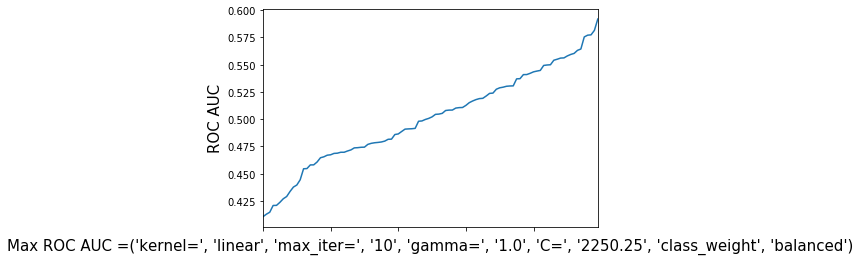

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')
#######################################
## Comprehensive Grid Search         ##
## Used to locate optimal parameters ##
#######################################
#kernel = ['linear', 'rbf', 'poly']
#max_iterations =  [10,15,30,60,100,500]
#gamma = [0.0001, 0.001, 0.01, 0.1, 1]
#hyper_param = [1, 5, 10, 25, 50, 100]
#class_weight = ['','balanced']
#degree = [3, 4, 5]

#######################################
## Abbreviated Grid Search           ##
## Based on results of above, but    ##
## abbreviated for runtime rendering ##
#######################################

kernel = ['linear']
max_iterations =  [10]
gamma = np.linspace(0.5, 1, 10)
#hyper_param = [0.1, 1, 10, 100, 1000, 10000]
hyper_param = np.linspace(1, 3000, 5)
class_weight = ['','balanced']
degree = [3]

best_kernel = ''
best_accuracy = 0
best_iteration_value = 0
best_gamma_value = 0
best_hyper_param = 0
best_class_weight = ''
model_accuracy = 0
model_balanced_accuracy = 0
best_ROC_AUC = 0
best_degree = 0

accuracies = []
result = {}
model = support_vector_machine_model
n_splits = 10

for iteration_value in max_iterations:
    for gamma_value in gamma:
        for penalty in hyper_param:
            for kernel_type in kernel:
                for class_weight_value in class_weight:
                    if kernel_type == 'poly':
                        for degree_value in degree:
                            params = {'kernel': kernel_type, 'max_iter': iteration_value, 
                                  'gamma': gamma_value, 'C': penalty, 
                                  'class_weight': class_weight_value, 'degree': degree_value
                                 }
                        
                            instance = ('kernel=', str(kernel_type), 'max_iter=', str(iteration_value),
                            'gamma=', str(gamma_value), 'C=', str(penalty), 'degree', str(degree_value),
                            'class_weight', class_weight_value)
                        
                            print(str(params))
                            #print('*'*50)
                            for i in range(1, n_splits+1):
                                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
                                yhat, _ = model(X_train=X_train, y_train=y_train, X_test=X_test,
                                **params)

                                
                                tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
                             
                                balanced_accuracy = balanced_accuracy_score(y_test, yhat) 
                                accuracy = accuracy_score(y_test, yhat)
                                ROC_AUC = roc_auc_score(y_test, yhat)
                                accuracies.append(ROC_AUC)
                                result[instance] = ROC_AUC
                                if ROC_AUC > best_ROC_AUC:# and tp > 0:
                                    best_kernel = kernel_type
                                    best_ROC_AUC = ROC_AUC
                                    best_iteration_value = iteration_value
                                    best_gamma_value = gamma_value
                                    best_hyper_param = penalty
                                    best_class_weight = class_weight_value
                                    model_balanced_accuracy = balanced_accuracy
                                    model_accuracy = accuracy
                                    best_degree = degree_value

                                    try:
                                        #best_confusion = copy.deepcopy(pd.DataFrame(confusion_matrix(y_test, yhat)))
                                        best_confusion = copy.deepcopy(pd.DataFrame(confusion_matrix(y_test, yhat),
                                                                                    columns=['Predicted 0', 'Predicted 1'],
                                                                                    index=['Actual 0', 'Actual 1'],
                                                                                   ))
                                    except:
                                        print ("Confusion Matrix out of bounds")
                                        print ('Current Accuracy: ' + str(best_accuracy))
                                        print ('Current max_iterations: ' + str(best_iteration_value))
                                        print ('Current gamma: ' + str(best_gamma_value))
                                        print ('Current hyper_param: ' + str(best_hyper_param))
                                        best_confusion = "Confusion calculated out of bounds"

                                    matrix = pd.DataFrame(confusion_matrix(y_test, yhat),
                                        columns=['Predicted 0', 'Predicted 1'],
                                        index=['Actual 0', 'Actual 1'],
                                    )

                                    print('*' * 15 + ' Split Run %d ' % i + '*' * 15)
                                    print ('Better ROC AUC Score Found: ' + str(best_ROC_AUC))
                                    print ('Balanced Accuracy: ' + str(model_balanced_accuracy))
                                    print ('Accuracy: ' + str(model_accuracy))
                                    print ('Degree If Poly: ' + str(degree_value))
                                    print(matrix)
                        
                    else:
                        #degree_value = 0
                        params = {'kernel': kernel_type, 'max_iter': iteration_value, 
                              'gamma': gamma_value, 'C': penalty, 
                              'class_weight': class_weight_value
                             }
                        
                        instance = ('kernel=', str(kernel_type), 'max_iter=', str(iteration_value),
                        'gamma=', str(gamma_value), 'C=', str(penalty),'class_weight', class_weight_value)


                        print(str(params))

                        for i in range(1, n_splits+1):
                            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
                            yhat, _ = model(X_train=X_train, y_train=y_train, X_test=X_test,
                            **params)


                            tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()

                            balanced_accuracy = balanced_accuracy_score(y_test, yhat) 
                            accuracy = accuracy_score(y_test, yhat)
                            ROC_AUC = roc_auc_score(y_test, yhat)
                            accuracies.append(ROC_AUC)
                            result[instance] = ROC_AUC
                            if ROC_AUC > best_ROC_AUC:# and tp > 0:
                                best_kernel = kernel_type
                                best_ROC_AUC = ROC_AUC
                                best_iteration_value = iteration_value
                                best_gamma_value = gamma_value
                                best_hyper_param = penalty
                                best_class_weight = class_weight_value
                                model_balanced_accuracy = balanced_accuracy
                                model_accuracy = accuracy
                                

                                try:
                                    #best_confusion = copy.deepcopy(pd.DataFrame(confusion_matrix(y_test, yhat)))
                                    best_confusion = copy.deepcopy(pd.DataFrame(confusion_matrix(y_test, yhat),
                                                                                columns=['Predicted 0', 'Predicted 1'],
                                                                                index=['Actual 0', 'Actual 1'],
                                                                               ))
                                except:
                                    print ("Confusion Matrix out of bounds")
                                    print ('Current Accuracy: ' + str(best_accuracy))
                                    print ('Current max_iterations: ' + str(best_iteration_value))
                                    print ('Current gamma: ' + str(best_gamma_value))
                                    print ('Current hyper_param: ' + str(best_hyper_param))
                                    best_confusion = "Confusion calculated out of bounds"

                                matrix = pd.DataFrame(confusion_matrix(y_test, yhat),
                                    columns=['Predicted 0', 'Predicted 1'],
                                    index=['Actual 0', 'Actual 1'],
                                )

                                print('*' * 15 + ' Split Run %d ' % i + '*' * 15)
                                print ('Better ROC AUC Score Found: ' + str(best_ROC_AUC))
                                print ('Balanced Accuracy: ' + str(model_balanced_accuracy))
                                print ('Accuracy: ' + str(model_accuracy))
                                
                                print(matrix)

np.mean(accuracies)

result = pd.Series(result).sort_values(ascending=True)
plt.xlabel('Max ROC AUC ='+ str(result.idxmax()), fontsize=15)
plt.ylabel('ROC AUC', fontsize=15)
result.plot()
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])


optimal_param = result.argmax()
optimal_accuracy = result[optimal_param]
optimal_param
optimal_accuracy

print ('Best ROC AUC: ' + str(best_ROC_AUC))
print ('Balanced Accuracy: ' + str(model_balanced_accuracy))
print ('Accuracy: ' + str(model_accuracy))
print ('max_iterations: ' + str(best_iteration_value))
print ('gamma: ' + str(best_gamma_value))
print ('penalty: ' + str(best_hyper_param))
print ('class_weight: ' + str(best_class_weight))
print ('kernel: ' + str(best_kernel))
if best_kernel == 'poly':
    print ('Degree: ' + str(best_degree))
best_confusion

In [31]:
## Lets retrain the model and reshuffle
## add additional iterations

num_cv_iterations = 100
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)


for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables for readability
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# retrain the model just as before
svm_clf = SVC(C=best_hyper_param, kernel=best_kernel, gamma=best_gamma_value, 
              max_iter = best_iteration_value, class_weight = best_class_weight) 
svm_clf.fit(X_train, y_train)  # train object

y_hat = svm_clf.predict(X_test) # get test set predictions

balanced_accuracy = mt.balanced_accuracy_score(y_test,y_hat)
accuracy_score = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

StratifiedShuffleSplit(n_splits=100, random_state=None, test_size=0.2,
            train_size=None)


In [32]:
#balanced accuracy
print ('Balanced Accuracy: ' + str(balanced_accuracy))
print (' ')
print ('Accuracy: ' + str(accuracy_score))
print (' ')
#confusion matrix
pd.DataFrame(confusion_matrix(y_test, yhat),
             columns=['Predicted 0', 'Predicted 1'],
             index=['Actual 0', 'Actual 1'],)

Balanced Accuracy: 0.5090187422839136
 
Accuracy: 0.24087141193395903
 


,Predicted 0,Predicted 1
Actual 0,5671,7131
Actual 1,826,969


In [33]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(19, 134)
(19,)
[10  9]


column already deleted
[[ 1.64935279e-01 -2.03879062e-01  3.09054053e-01  4.52136298e-02
  -2.80181726e-01 -1.25120189e+00  2.74086309e-16 -7.41963905e-02
  -1.56504377e-01  2.44030734e-01 -1.37413565e-01  1.56125113e-17
   2.22044605e-16 -8.67361738e-19  1.36266504e-01 -6.03683770e-16
   2.49400765e-01 -4.23003660e-01  3.12250226e-17  2.60208521e-17
   3.57786717e-18 -1.38777878e-17 -1.38777878e-17 -3.98986399e-17
   3.12250226e-16  1.38777878e-17  1.73472348e-17 -1.56125113e-17
  -1.73472348e-17  1.04083409e-17  3.46944695e-18  2.42861287e-17
  -3.81639165e-17 -6.41847686e-17  8.34835673e-18 -1.17961196e-16
   1.17961196e-16  1.56125113e-17  2.81892565e-17  2.42861287e-17
  -1.38777878e-17  1.62630326e-18 -4.25007252e-17 -3.03576608e-18
  -1.70002901e-16  1.63331665e-01 -2.02778154e-01  1.75207071e-16
   6.24500451e-17 -5.55111512e-17  1.15356935e-02  1.47158659e-01
   0.00000000e+00  6.93889390e-18  5.03069808e-17 -1.28369537e-16
  -1.67858911e-01  1.19419047e-01 -4.77048956e-18 -2.

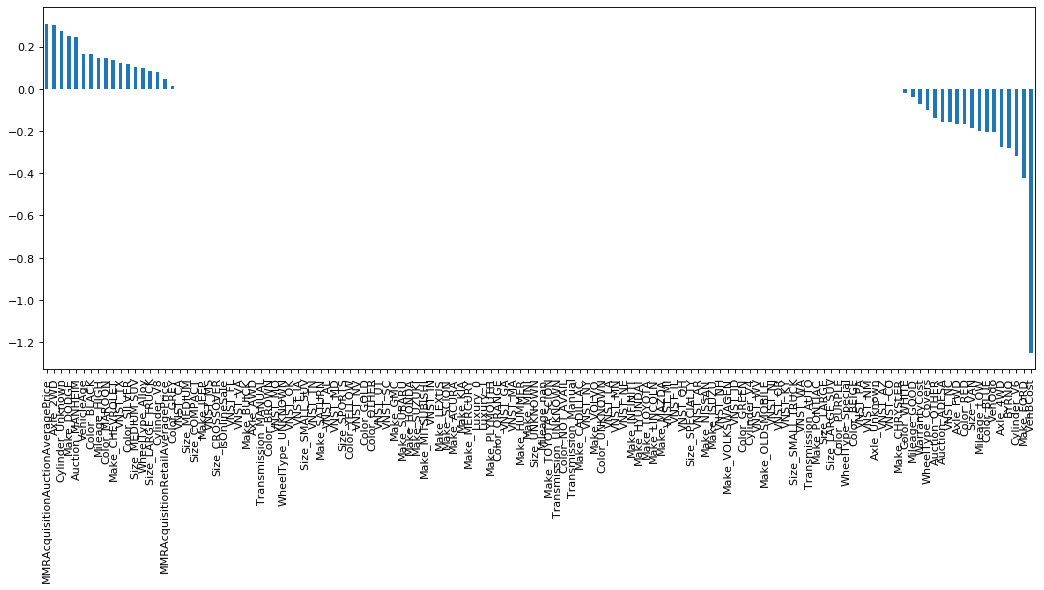

In [34]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
from matplotlib.pyplot import figure
try:
    del one_hot['IsBadBuy']
except:
    print("column already deleted")
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=one_hot.columns).sort_values(ascending=False)
weights.plot(kind='bar')

In [35]:
# make a dataframe of the training data
df_tested_on = one_hot.iloc[train_indices].copy() 
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()
df_imputed2 = one_hot

df_support['IsBadBuy'] = y[svm_clf.support_] 
df_imputed2['IsBadBuy'] = y
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 70676 to 60677
Columns: 135 entries, VehicleAge to IsBadBuy
dtypes: float64(5), int64(4), uint8(126)
memory usage: 3.8 KB


********Largest Weights********
['MMRAcquisitionAuctionAveragePrice', 'Axle_2WD', 'Cylinder_Unknown', 'Make_DODGE', 'Auction_MANHEIM', 'VehicleAge', 'Color_BLACK', 'Mileage_HIGH', 'Color_MAROON', 'Make_CHEVROLET', 'VNST_TX', 'Color_SILVER', 'Size_MEDIUM SUV', 'WheelType_Alloy', 'Size_LARGE TRUCK', 'Cylinder_V8', 'MMRAcquisitionRetailAveragePrice', 'Color_GREY', 'VNST_CA', 'Size_MEDIUM', 'Size_COMPACT', 'Make_JEEP', 'VNST_MS', 'Size_CROSSOVER', 'IsOnlineSale', 'VNST_FL', 'VNST_VA', 'Make_BUICK', 'Axle_AWD', 'Transmission_MANUAL']
 
********Smallest Weights********
['VehBCost', 'Make_FORD', 'Cylinder_V6', 'BYRNO', 'Axle_4WD', 'VehOdo', 'Color_BLUE', 'Mileage_LOW', 'Size_VAN', 'Color_RED', 'Axle_FWD', 'VNST_NC', 'Auction_ADESA', 'Auction_OTHER', 'WheelType_Covers', 'WarrantyCost', 'Mileage_GOOD', 'Color_WHITE', 'Make_CHRYSLER', 'VNST_CO', 'VNST_AZ', 'Axle_Unknown', 'VNST_NM', 'VNST_PA', 'Color_BEIGE', 'WheelType_Special', 'Color_PURPLE', 'Size_LARGE', 'Size_LARGE SUV', 'Make_PONTIAC']
 
N

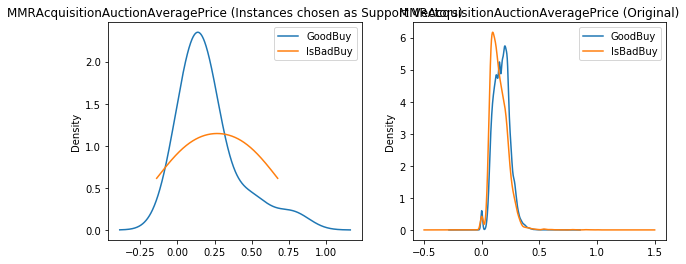

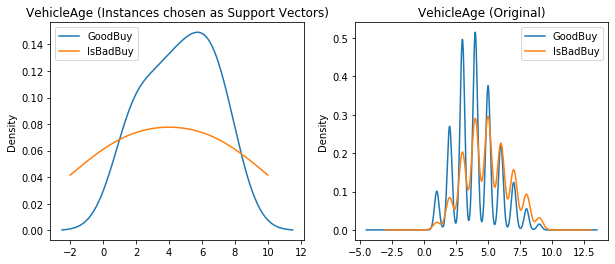

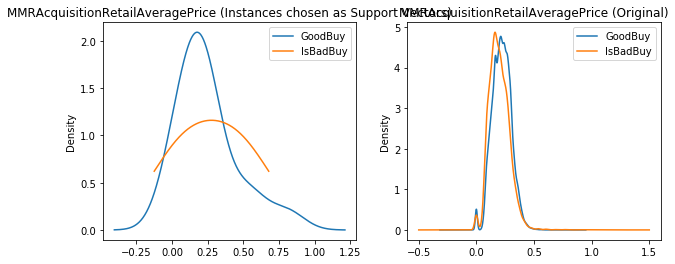

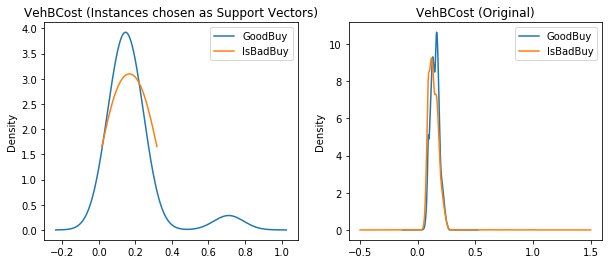

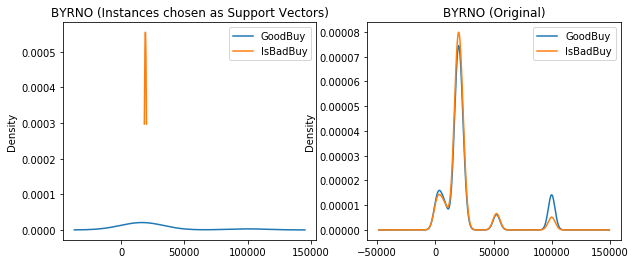

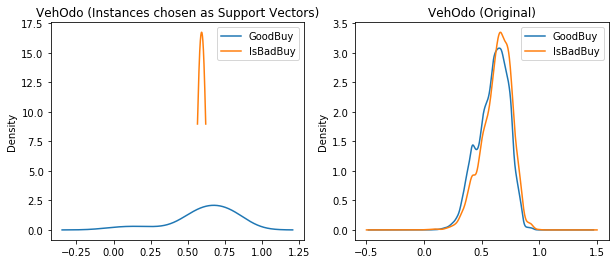

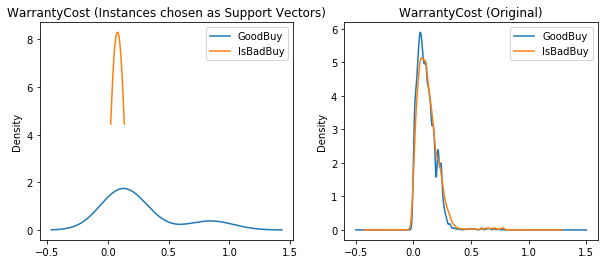

In [38]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

continuous_features = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice',
                       'MMRAcquisitionAuctionCleanPrice',
                       'MMRAcquisitionRetailAveragePrice',
                       'MMRAcquisitionRetailCleanPrice',
                       'MMRCurrentAuctionAveragePrice',
                       'MMRCurrentAuctionCleanPrice',
                       'MMRCurrentRetailAveragePrice',
                       'MMRCurrentRetailCleanPrice',
                       'VehBCost',
                       'WarrantyCost','IsBadBuy', 'PurchDate', 'VehYear',
                       'VehicleAge', 'WheelTypeID', 'BYRNO',
                       'VNZIP1']

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['IsBadBuy'])
df_grouped = df_imputed2.groupby(['IsBadBuy'])

print('********Largest Weights********')
print(weights.nlargest(30).index.tolist())
print(' ')
print('********Smallest Weights********')
print(weights.nsmallest(30).index.tolist())

a = weights.nlargest(30).index.tolist() + weights.nsmallest(30).index.tolist()

# plot KDE of Different variables
vars_to_plot = a

print(" ")
for v in vars_to_plot:
    if v in continuous_features:
        try:
            plt.figure(figsize=(10,4))
            # plot support vector stats
            plt.subplot(1,2,1)
            ax = df_grouped_support[v].plot.kde() 
            plt.legend(['GoodBuy','IsBadBuy'])
            plt.title(v+' (Instances chosen as Support Vectors)')

            # plot original distributions
            plt.subplot(1,2,2)
            ax = df_grouped[v].plot.kde() 
            plt.legend(['GoodBuy','IsBadBuy'])
            plt.title(v+' (Original)')
        except:
            print('No KDE Possible: ' + v)
    else:
        print("Not a continuous feature. " + v)

# Advantages vs Disadvantages

• **[10 points] Discuss the advantages of each model for each classification task. Does one type
of model offer superior performance over another in terms of prediction accuracy? In terms of
training time or efficiency? Explain in detail.** 



The logistic regression is suited for our dataset because the dependent variable is categorical where we are predicting the probability of a car purchased from auction is a “kicked” car or not. GLM offers the flexibility in logistic regression for binary classification for model fitting and its ability to scale with large datasets extremely well.

We leveraged hyperparameters (alpha, lambda) for tuning/fitting the underlying model to our dataset which helped distinguish them from model coefficients. The optimization of the sets of hyperparameter values help find the best model for the dataset. H2O helps grouping the hyperparameters by their importance. We used cross-validation for training the dataset to manage the risk of overfitting of our model and to test the model’s minimum validation error for hyperparameter vector. 

Due to the binomial nature of our model we explored AUC (area under curve) classification which is 0.75 for our model. We are predicting if the auction car is a “bad” or not. There can be four combination true positive (TP), true negative (TN), false positive (FP – Type I error) and false negative (FN – Type II error) of a model. AUC helps define the precision of our model in terms of how many true positive we were able to predict. 

Though there is no significant resemblance in both models, the generalized regression is simpler and probabilistic compare to SVM where we explore an ideal hyperplane in regard to the support vectors. Due to its simplicity we performed logistic regression first to see if there is any issue in separating dataset linearly. 
SVM naturally performs well right out of the box in extreme cases. It is very effective in higher dimensions but fails to offer probability estimates. Our SVM model performed with 87% accuracy which suggested that the decision boundaries are clear with largest margin possible between classes. However, knowing that the imbalance of data contributed partially to the higher accuracy score, we chose to pivot to SVM utilizing the sklearn package in order to tackle the imbalance in our dataset and have more detailed control on our grid search criteria. Our model achieved 51% balanced accuracy.

There are many ways to resample the dataset for enrichment. In our data the target variable “IsBadBuy” is assumed to be Yes/No, with Yes as the class of interest, a rare class. As we ran our model and look through metrics, Accuracy which is simply the fraction of the information that can be classified correctly. Precision is the percentage of predicted result that is relevant, and Recall is the percentage of total relevant results that is correctly classified by our algorithm. Our regression model scored 0.4672 for precision and 0.3647 for recall. While we can’t optimize both at the same time, the F1, a mean of both precision and recall, for regression model scored 0.4096 was the highest amongst all model. 

Comparing all models from their training time efficiency, we saw that GLM appears to be faster in many ways compare to SVM and more interpretable. And clearly from all model metrics (AUC, Accuracy, Precision, Recall and F1) values, GLM model is an indication of a better and robust model.


# Feature Interpretation - Logistic Weights

• **[30 points] Use the weights from logistic regression to interpret the importance of different
features for each classification task. Explain your interpretation in detail. Why do you think
some variables are more important?** 

* The odds for being identified as a kick increases by  2.928598 when the wheel type is unknown and holding all other variables constant. 
* The odds for being a kick increases by 1.220302 when the state is New Hamphire holding all other variables constant. 
* For every one unit increase in vehicleAge, the odds for being a kick increases by .523732 units holding all other variables constant. 
* The odds for being a kick increases by 0.501585 when the Make is Suzuki and holding all other variables constant
* The odds for being a kick increases by 0.441092 when the state is Pennsylvania holding all other variables constant. 
* The odds for being a kick increases by 0.387122 when the state is Illinois  holding all other variables constant. 
* The odds for being a kick increases by 0.385498 when the size is sports holding all other variables constant. 
* The odds for being a kick increases by 0.37027 when the axle is awd holding all other variables constant.
* The odds for being a kick increases by 0.361377 when State is Virginia holding all other variables constant. 
* The odds for being a kick increases by 0.348979  when State is  Maryland holding all other variables constant. 
* The odds for being a kick increases by 0.348197 when State is Oklahoma holding all other variables constant. 
* The odds for being a kick increases by 0.325144 when State is Mississippi holding all other variables constant. 
* The odds for being a kick increases by 0.32071 when the size is Large SUV holding all other variables constant. 
* The odds for being a kick increases by 0.292471 when State is New Jersey holding all other variables constant. 
* The odds for being a kick increases by 0.292449 when Make is Nissan holding all other variables constant. 
* The odds for being a kick increases by 0.240636 when Make is Lexus holding all other variables constant. 
* The odds for being a kick increases by 0.240573 when Make Subaru holding all other variables constant. 
* The odds for being a kick increases by 0.223143 when State is Nevada holding all other variables constant. 
* For every 1 dollar increase in MMRAcquisitionRetailAverage Price the odds for having a kick increases by 0.211432  holding all other variables constant. 
* The odds for being a kick increases by 0.200811 when State is Texas holding all other variables constant. 
* The odds for being a kick increases by 0.19801 when Make Chrysler holding all other variables constant. 
* The odds for being a kick increases by 0.186654 when color is brown holding all other variables constant. 
* The odds for being a kick increases by 0.185843 when the size is medium SUV holding all other variables constant. 
* The odds for being a kick increases by 0.172089 when Make Mazda holding all other variables constant. 
* The odds for being a kick increases by 0.166489 when Make Mercury holding all other variables constant. 
* The odds for being a kick increases by 0.158021 when Make Jeep holding all other variables constant. 
* The odds for being a kick increases by 0.156944 when Make Acura holding all other variables constant. 
* The odds for being a kick increases by 0.154916 when Mileage is High holding all other variables constant. 
* The odds for being a kick increases by 0.109263 when State is Indiana holding all other variables constant. 
* The odds for being a kick increases by 0.106356 when Make Kia holding all other variables constant. 
* The odds for being a kick increases by 0.102844 when State is Missouri holding all other variables constant. 
* The odds for being a kick increases by 0.096139 when color is red holding all other variables constant. 
* The odds for being a kick increases by 0.093721 when State is California holding all other variables constant. 
* The odds for being a kick increases by 0.086754 when color is Gold holding all other variables constant. 
* The odds for being a kick increases by 0.084209 when Make Ford holding all other variables constant. 
* The odds for being a kick increases by 0.081276 when Make Dodge holding all other variables constant. 
* For every 1 dollar increase in WarrantyCost  the odds for having a kick increases by 0.070161 holding all other variables constant. 
* The odds for being a kick increases by 0.063619 when the size is compact holding all other variables constant. 
* The odds for being a kick increases by 0.062696 when the cylinder is unknown holding all other variables constant. 
* The odds for being a kick increases by 0.056512 when State is LA  holding all other variables constant. 
* The odds for being a kick increases by 0.05102 when vehicle is luxury holding all other variables constant. 
* The odds for being a kick increases by 0.039878 when State is Iowa holding all other variables constant. 
* The odds for being a kick increases by 0.034746 when auction is Manheim holding all other variables constant. 
* The odds for being a kick increases by 0.031762 when Make Infiniti holding all other variables constant. 
* The odds for being a kick increases by 0.030125 when axle is 4WD holding all other variables constant. 
* The odds for being a kick increases by 0.019685 when color is white holding all other variables constant. 
* For every 1 unit increase in the VehOdo, the odds for being a kick increases by 0.017636 while  holding all other variables constant. 
* The odds for being a kick increases by 0.017444 when color is silver holding all other variables constant. 
* The odds for being a kick increases by 0.017213 when the size is large truck holding all other variables constant. 
* The odds for being a kick increases by 0.014527 when cylinder is V4 holding all other variables constant. 
* The odds for being a kick increases by 0.010358 when color is black holding all other variables constant. 
* The odds for being a kick increases by 0.007596 when State is Arizona  holding all other variables constant. 
* The odds for being a kick increases by 0.003845when Axle is 4WD holding all other variables constant. 
* The odds for being a kick decreases by 0.001693 when cylinder is V6  holding all other variables constant. 
* The odds for being a kick decreases by 0.002703 when the size is small truck holding all other variables constant. 
* The odds for being a kick decreases by 0.013853 when color is blue holding all other variables constant. 
* The odds for being a kick decreases by 0.0025067 when the size is specialty holding all other variables constant. 
* For every $1 increase in the MMRAcquisitionAuctionAveragePrice, the odds for being a kick decreases by 0.031448  while  holding all other variables constant. 
* The odds for being a kick decreases by 0.035128 when color is Green while holding all other variables constant. 
* The odds for being a kick decreases by 0.041456 when Axle is unknown while holding all other variables constant. 
* The odds for being a kick decreases by 0.047285 when onLineSale while holding all other variables constant. 
* The odds for being a kick decreases by 0.056327 whenAuction is Other while holding all other variables constant. 
* The odds for being a kick decreases by 0.057841 when color is maroon holding all other variables constant. 
* The odds for being a kick decreases by 0.072394 when Make is Pontiac holding all other variables constant. 
* The odds for being a kick decreases by 0.078768 when State is Colorado holding all other variables constant. 
* The odds for being a kick decreases by 0.093453 when cylinder is V8 holding all other variables constant. 
* The odds for being a kick decreases by 0.096459 when State is West Virginia holding all other variables constant. 
* The odds for being a kick decreases by 0.104612 when the size is medium holding all other variables constant. 
* The odds for being a kick decreases by 0.106858 when Make is Oldsmobile holding all other variables constant. 
* The odds for being a kick decreases by 0.108002 when the State is New Mexico holding all other variables constant. 
* The odds for being a kick decreases by 0.114064 when the State is Washington holding all other variables constant. 
* The odds for being a kick decreases by 0.114398 when the State is South Carolina holding all other variables constant. 
* The odds for being a kick decreases by 0.116243 when the State is Minnesota holding all other variables constant. 
* The odds for being a kick decreases by 0.11809 when wheel Type is special holding all other variables constant. 
* The odds for being a kick decreases by 0.106858 when Make is Saturn holding all other variables constant. 
* The odds for being a kick decreases by 0.131864 when the State is Utah holding all other variables constant. 
* The odds for being a kick decreases by 0.148698 when the State is Michigan holding all other variables constant. 
* The odds for being a kick decreases by 0.150323 when the size is Large holding all other variables constant. 
* The odds for being a kick decreases by 0.157838 when the color is yellow holding all other variables constant. 
* The odds for being a kick decreases by 0.16368 when the State is Arkansas holding all other variables constant. 
* The odds for being a kick decreases by 0.166227when the State is Georgia holding all other variables constant. 
* The odds for being a kick decreases by 0.166839when theAxle is 2WD holding all other variables constant. 
* The odds for being a kick decreases by 0.184063 when the transmission is Manual holding all other variables constant. 
* The odds for being a kick decreases by 0.214458 when the State is Florida holding all other variables constant. 
* The odds for being a kick decreases by 0.21804 when the Mileage is low holding all other variables constant. 
* The odds for being a kick decreases by 0.232628 when the Make is Mitsubishi holding all other variables constant. 
* The odds for being a kick decreases by 0.232816 when the Size is Van holding all other variables constant. 
* The odds for being a kick decreases by 0.236878 when the Make is Scion  holding all other variables constant. 
* The odds for being a kick decreases by 0.237643 when the Make is Chevrolet holding all other variables constant. 
* The odds for being a kick decreases by 0.241814 when the Size is Crossover holding all other variables constant. 
* The odds for being a kick decreases by 0.28926 when the Make is GMC  holding all other variables constant. 
* The odds for being a kick decreases by 0.291652 when the Make is Isuzu holding all other variables constant. 
* The odds for being a kick decreases by 0.304657 when the State is North Carolina holding all other variables constant. 
* For every 1 dollar increase in VehBCost the odds for a kick decreases by .308053 while holding all other variables constant. 
* The odds for being a kick decreases by 0.308897 when the Make is Honda holding all other variables constant. 
* The odds for being a kick decreases by 0.325266 when the State is Tennessee holding all other variables constant. 
* The odds for being a kick decreases by 0.330177 when the Make is Volvo holding all other variables constant. 
* The odds for being a kick decreases by 0.332972 when the State is Ohio holding all other variables constant. 
* The odds for being a kick decreases by 0.356014 when the Make is Buick holding all other variables constant. 
* The odds for being a kick decreases by 0.356433 when the WheelType is Alloy holding all other variables constant. 
* The odds for being a kick decreases by 0.406702 when the State is Idaho holding all other variables constant. 
* The odds for being a kick decreases by 0.426345 when the WheelType is Cover holding all other variables constant. 
* The odds for being a kick decreases by 0.497044 when the Make is Cadillac holding all other variables constant. 
* The odds for being a kick decreases by 0.730282 when the State is  Kentucky holding all other variables constant. 
* The odds for being a kick decreases by 0.753898 when the State is  Oregon holding all other variables constant. 
* The odds for being a kick decreases by 0.790945 when the Color is Unknown holding all other variables constant. 
* The odds for being a kick decreases by 0.830826 when the Transmission is unknown holding all other variables constant. 
* The odds for being a kick decreases by -1.088967 when the Color is Other holding all other variables constant. 

When assessing the magnitude of the coefficients  associated with the classification of a kick, the WheelType Unknown is listed 
with the highest order coefficient.  This is in alignment with our understanding of the data since 70% of the vehicles with a 
WheelType of unknown are listed as kicks.  While only 4% of the vehicles have an UNKNOWN wheeltype, that 4% contributes to 25% of kicks.   

Many of the states have a 10% or higher rating of kicks and hence  it is not surprising that various states may appear in the highest range of coefficients.  New Hampshire is listed with the highest coefficient amongst the State variables.   Only 97 out of the 72K+ vehicles were in New Hampshire, but 10% of those were kicks.  While some of the coefficients are clear to understand, others may be related to unbalancing such as "Transmission Unknown".  There are very few vehicles with this status (9) and hence having one kick will register high in the coefficients although negative in this case.   VehicleAge is also listed amongst the highest coefficients, which is supported by our analysis of the data that older cards have a higher rate of kicks.   

While this comparison is noting the magnitude of the coefficients it does not address whether or not the associated parameters are statistically significant. Checking for significance in additional models, which were not included in this report, verified our findings.

In researching the auctions and how the cars are assessed, we feel that some of the variables are more important than others.   The VehAge, VehOdo and Mileage speak to the wear-and-tear of the vehicle and hence can be a significant indicator into the overall health of the vehicle.   While some parameters may not seem important like color, the auction guidelines revealed that “Color Unknown” is used when the vehicles have custom colors normally after body work.   Certain parameters like TRIM and TopThreeAmericanName did not seem important and were removed from the logistic regression.  


# Data Insights - Support Vector

• **[10 points] Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain.** 

We reviewed support vectors and their weights for a number of features using Kernel Density Estimation (KDE). From a visual inspection of feature importance, we found significance for the following variables:

Positive Weights Top 5
* 'Mileage_HIGH'
* 'Size_LARGE'
* 'MMRAcquisitionRetailAveragePrice'
* 'Transmission_AUTO'
* 'WheelType_Covers'

Negative Weights Bottom 5
* 'VehBCost'
* 'Mileage_GOOD'
* 'Transmission_MANUAL'
* 'WheelType_Alloy'
* 'BYRNO'

Unfortunately, many of these are categorical variables, and thus it is impossible to discern how much more effective the support vectors were at defining the classification boundaries for those variables. We could however analyze KDE for MMRAcquisitionRetailAveragePrice, VehOdo, WarrantyCost, VehicleAge, VehBCost, and BYRNO. 

In review the chosen support vectors, many insights can be formulated, some of which make intuitive sense. 
* High mileage cars increase the chance that the car is a bad buy.
* Larger cars typically have larger problems, as opposed to smaller, lighter use cars.
* Higher retail acquisition average price cars being auctioned off increase the chance that the car may be bad. ]This indicates that the process of purchasing cars and classifying them as a bad buy is dependent on the average retail price for that car in the retail market. The higher the price in the retail market, the more likely it is that the car will be a bad buy.
* Equally, alloy wheels versus covers, seems to indicate a stronger likelihood of a good buy, given this data, all else equal.

The SVM did a decent job of maintaining the original data integrity for MMRAcquisitionRetailAveragePrice, however with other variables graphed for KDE, the model shows its weaknesses. The model for VehOdo, WarrantyCost, VehicleAge, VehBCost, and BYRNO did not preserve original data integrity. It is our hope that this could be improved with additional grid search or additional stratification or balancing techniques. That being said, we also admit that SVM may be a poor classifier for this data on its own. It may, however, serve well in part of an overall ensemble. 
